## All Visualizations

#### Load CSV

In [1]:
import pandas as pd
import ast
import numpy as np
import glob

import os
os.getcwd()

'/mnt/c/Users/rizki/Master Files/ThesisUMCG/Survival-Tree-Analysis'

In [2]:
ROOT_DIR = "results"

In [3]:
xgb_files = glob.glob("xgboost_*.csv", root_dir=ROOT_DIR)
rsf_files = glob.glob("results_rsf_*.csv", root_dir=ROOT_DIR)

In [4]:
def clean_column_values(df):
    for col in ['hyperparams', 'c_index', 'brier_score', 'mae']:
        if col in df.columns:
            df[col] = df[col].apply(
                lambda x: [float(i) for i in ast.literal_eval(x.replace("np.float64", ""))]
                if '[' in x else ast.literal_eval(x)
            )

    return df

#### XGBOOST_AFT

In [5]:
xgb_files

['xgboost_extreme_nhanes.csv',
 'xgboost_extreme_support.csv',
 'xgboost_logistic_nhanes.csv',
 'xgboost_logistic_support.csv',
 'xgboost_normal_nhanes.csv',
 'xgboost_normal_support.csv']

In [6]:
xgb_dfs = pd.DataFrame()
for file in xgb_files:
    base = os.path.basename(file)
    parts = base.replace(".csv", "").split("_")
    model = parts[0]
    function = parts[1]
    dataset = parts[2]

    dir = os.path.join(ROOT_DIR, file)

    df = pd.read_csv(dir)
    df = clean_column_values(df)
    df['model'] = model
    df['function'] = function
    df['dataset'] = dataset

    df['c_index'] = df["c_index"].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    )
    df['brier_score'] = df["brier_score"].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    )
    df['mae'] = df["mae"].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    ) 

    xgb_dfs = pd.concat([xgb_dfs, df], ignore_index=True)
    
xgb_dfs

,hyperparams,c_index,brier_score,mae,mean_c_index,mean_brier_score,mean_mae,c_index_test,brier_score_test,mae_test,model,function,dataset
0,"{'max_depth': 6, 'sigma': 50, 'learning_rate':...","[0.7561010225127712, 0.7569149483165192, 0.748...","[0.13073099274049288, 0.1331507578972322, 0.13...","[2.3473675968497914e+27, 4.909494940699281e+26...",0.753590,0.130860,1.761596e+27,0.755636,0.137346,5.242410e+26,xgboost,extreme,nhanes
1,"{'max_depth': 3, 'sigma': 5, 'learning_rate': ...","[0.7944884212304986, 0.8090909735642985, 0.795...","[0.23966023914678153, 0.24519099345694814, 0.2...","[11.805006790034312, 10.864896353447076, 11.89...",0.798397,0.245306,1.130685e+01,0.795589,0.244892,1.186686e+01,xgboost,extreme,nhanes
2,"{'max_depth': 6, 'sigma': 50, 'learning_rate':...","[0.7426539086638262, 0.759379443626886, 0.7410...","[0.13073099274049288, 0.1331507578972322, 0.13...","[9.37849233242861e+27, 7.547166619699144e+27, ...",0.750470,0.130860,7.170147e+27,0.758938,0.137346,8.041196e+27,xgboost,extreme,nhanes
3,"{'max_depth': 6, 'sigma': 1, 'learning_rate': ...","[0.8082957157033565, 0.818916685874364, 0.8041...","[0.14766798569767886, 0.15257396423412625, 0.1...","[42.45240365550028, 39.82657242413321, 71.6721...",0.809000,0.149828,4.780122e+01,0.809527,0.154937,4.425257e+01,xgboost,extreme,nhanes
4,"{'max_depth': 10, 'sigma': 1, 'learning_rate':...","[0.7151608621508713, 0.7375394053296928, 0.718...","[0.8111063959998766, 0.80903528557671, 0.80942...","[9.336588726689417, 9.194251052207417, 9.51123...",0.720244,0.811386,9.337877e+00,0.715975,0.804852,9.739859e+00,xgboost,extreme,nhanes
5,"{'max_depth': 3, 'sigma': 1, 'learning_rate': ...","[0.7598510512308765, 0.7742568394177408, 0.753...","[0.8129275633359554, 0.8110127015873616, 0.811...","[9.3448703682169, 9.202013493035778, 9.5157625...",0.764521,0.813333,9.345720e+00,0.765123,0.807075,9.750633e+00,xgboost,extreme,nhanes
6,"{'max_depth': 10, 'sigma': 10, 'learning_rate'...","[0.8101959278838351, 0.8165011258665626, 0.804...","[0.1404340590316136, 0.14904899555793236, 0.14...","[11098458447920.791, 155237484095477.28, 98307...",0.810436,0.143488,7.017185e+13,0.807663,0.151379,3.176768e+14,xgboost,extreme,nhanes
7,"{'max_depth': 10, 'sigma': 5, 'learning_rate':...","[0.8076787396346168, 0.8192212904026525, 0.807...","[0.14119780648461883, 0.14498302028469096, 0.1...","[659130.283897817, 383070.63512967987, 437366....",0.810985,0.141496,4.677794e+05,0.808505,0.147181,4.874430e+05,xgboost,extreme,nhanes
8,"{'max_depth': 6, 'sigma': 0.5, 'learning_rate'...","[0.8031601773630184, 0.8152054041595007, 0.806...","[0.1535752123997055, 0.15605120314064236, 0.15...","[28.15708469028803, 11.459186894072827, 11.549...",0.806991,0.153405,1.512674e+01,0.805451,0.157167,1.197285e+01,xgboost,extreme,nhanes
9,"{'max_depth': 6, 'sigma': 1, 'learning_rate': ...","[0.80781584542767, 0.8198897182674066, 0.80272...","[0.14774064692262015, 0.15120480088360977, 0.1...","[35.182352346520055, 32.509299138077985, 46.43...",0.808659,0.149908,3.800953e+01,0.808824,0.154913,3.641104e+01,xgboost,extreme,nhanes


#### RSF

In [7]:
rsf_files

['results_rsf_nhanes.csv', 'results_rsf_support.csv']

In [8]:
rsf_dfs = pd.DataFrame()
for file in rsf_files:
    base = os.path.basename(file)
    dataset = base.replace('results_rsf_', '').replace('.csv', '')
    model = 'rsf'
    function = None

    dir = os.path.join(ROOT_DIR, file)

    df = pd.read_csv(dir)
    df = clean_column_values(df)
    df['model'] = model
    df['function'] = function
    df['dataset'] = dataset

    df['c_index'] = df["c_index"].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    )
    df['brier_score'] = df["brier_score"].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    )
    df['mae'] = df["mae"].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    ) 


    rsf_dfs = pd.concat([rsf_dfs, df], ignore_index=True)

In [9]:
rsf_dfs

,hyperparams,c_index,brier_score,mae,mean_c_index,mean_brier_score,mean_mae,c_index_test,brier_score_test,mae_test,model,function,dataset
0,"{'n_trees': 100, 'max_depth': 15, 'min_samples...","[0.7632775843886156, 0.7760709916490842, 0.756...","[0.14630151928098523, 0.1486180572153797, 0.15...","[3.15920966688439, 3.1301454138702467, 3.26393...",0.765962,0.146786,3.148516,0.771542,0.146522,3.165434,rsf,None,nhanes
1,"{'n_trees': 10, 'max_depth': 10, 'min_samples_...","[0.745571297606281, 0.7720990762575132, 0.7559...","[0.1401532041401287, 0.14539400099449784, 0.14...","[3.0991182233834103, 3.11761744966443, 3.22530...",0.755234,0.143580,3.122728,0.757181,0.143934,3.134753,rsf,None,nhanes
2,"{'n_trees': 100, 'max_depth': 15, 'min_samples...","[0.7602734852959595, 0.7704296023120157, 0.751...","[0.14668251073882702, 0.1481122582882692, 0.15...","[3.1771173524929246, 3.138199105145415, 3.2589...",0.762615,0.146473,3.153189,0.765064,0.145930,3.154895,rsf,None,nhanes
3,"{'n_trees': 20, 'max_depth': 5, 'min_samples_s...","[0.7269830870740364, 0.7239942554210032, 0.730...","[0.13528469328126277, 0.13264581558254837, 0.1...","[3.062159808404094, 2.9942393736017907, 3.1103...",0.731249,0.134256,3.033446,0.732769,0.132803,3.005354,rsf,None,nhanes
4,"{'n_trees': 20, 'max_depth': 15, 'min_samples_...","[0.759245932960455, 0.7698806758745412, 0.7574...","[0.14648922395585676, 0.15232223511383072, 0.1...","[3.1476703679512306, 3.2038031319910525, 3.285...",0.761335,0.148902,3.178108,0.766756,0.149236,3.172446,rsf,None,nhanes
5,"{'n_trees': 100, 'max_depth': 5, 'min_samples_...","[0.7372930721554439, 0.756912111487385, 0.7419...","[0.13397218116226345, 0.1356757349046034, 0.13...","[3.0432179403440025, 3.026733780760627, 3.0631...",0.744766,0.133284,3.014853,0.743661,0.134389,3.038331,rsf,None,nhanes
6,"{'n_trees': 100, 'max_depth': 10, 'min_samples...","[0.7548737403868458, 0.7747915817095442, 0.750...","[0.14215437349771376, 0.14393707170910056, 0.1...","[3.1229044197692146, 3.1003914988814323, 3.214...",0.761367,0.142405,3.110390,0.762194,0.141411,3.104666,rsf,None,nhanes
7,"{'n_trees': 50, 'max_depth': 10, 'min_samples_...","[0.7515995058262551, 0.7711597312104396, 0.753...","[0.14262287894342263, 0.14497449801121204, 0.1...","[3.124210755497497, 3.1087248322147656, 3.2108...",0.760525,0.142555,3.111537,0.762993,0.142670,3.121664,rsf,None,nhanes
8,"{'n_trees': 20, 'max_depth': 15, 'min_samples_...","[0.7523228315236604, 0.7649481392173898, 0.755...","[0.14724254858922667, 0.15130058011755426, 0.1...","[3.1710755497496197, 3.170469798657719, 3.2531...",0.757026,0.148542,3.175194,0.759457,0.148017,3.167262,rsf,None,nhanes
9,"{'n_trees': 20, 'max_depth': 15, 'min_samples_...","[0.7561632759539414, 0.7696381269835642, 0.758...","[0.14743098267858737, 0.15242307759431145, 0.1...","[3.168245155671675, 3.1695749440715892, 3.2787...",0.763819,0.148558,3.166063,0.760276,0.149519,3.195733,rsf,None,nhanes


#### AFT-FOREST

In [10]:
NHANES_AFT_DIR = f"{ROOT_DIR}/results_aft/nhanes"
SUPPORT_DIR = f"{ROOT_DIR}/results_aft/support"

nhanes_aft_files = glob.glob("results_*.csv", root_dir=NHANES_AFT_DIR)
nhanes_aft_dfs = pd.DataFrame()

support_aft_files = glob.glob("results_*.csv", root_dir=SUPPORT_DIR)
support_aft_dfs = pd.DataFrame()


print(nhanes_aft_files)

['results_1.csv', 'results_10.csv', 'results_11.csv', 'results_2.csv', 'results_3.csv', 'results_4.csv', 'results_5.csv', 'results_6.csv', 'results_7.csv', 'results_8.csv', 'results_9.csv']


In [11]:
import json 

def input_file(files, dir_root, dataset, model):
    dfs = pd.DataFrame()
    for file in files:
        dir = os.path.join(dir_root, file)

        df = pd.read_csv(dir)
        df = clean_column_values(df)
        df['model'] = model
        df['dataset'] = dataset

        df['params_dict'] = df['params'].apply(ast.literal_eval)

        df['function'] = df['params_dict'].apply(lambda d: d['function'])
        df['bootstrap'] = df['params_dict'].apply(lambda d: d.get('is_bootstrap', False))
        df['custom_dist'] = df['params_dict'].apply(lambda d: d.get('is_custom_dist', False))
        df['c_index'] = df["c_index"].apply(
            lambda x: ast.literal_eval(x) if isinstance(x, str) else x
        )
        df['brier_score'] = df["brier_score"].apply(
            lambda x: ast.literal_eval(x) if isinstance(x, str) else x
        )
        df['mae'] = df["mae"].apply(
            lambda x: ast.literal_eval(x) if isinstance(x, str) else x
        )

        dfs = pd.concat([dfs, df], ignore_index=True)

    return dfs


In [12]:
aft_nhanes_dataset = input_file(nhanes_aft_files, NHANES_AFT_DIR, "nhanes", "aft_forest")

In [13]:
aft_nhanes_dataset

,params,c_index,brier_score,mae,mean_c_index,mean_brier_score,mean_mae,c_index_test,brier_score_test,mae_test,index,model,dataset,params_dict,function,bootstrap,custom_dist
0,"{'function': 'extreme', 'is_bootstrap': False,...","[0.7810027695370196, 0.6222719455328807, 0.710...","[0.38962510631126496, 0.3791282542120146, 0.37...","[4.527925531914893, 4.799058291245791, 4.66621...",0.640200,0.380841,4.661019,0.784826,0.389569,4.775878,37,aft_forest,nhanes,"{'function': 'extreme', 'is_bootstrap': False,...",extreme,False,False
1,"{'function': 'extreme', 'is_bootstrap': True, ...","[0.598515329539332, 0.5781745004521196, 0.6430...","[0.3878062176345489, 0.3880716030944452, 0.383...","[4.551972517730496, 4.8463278619528625, 4.6688...",0.577537,0.383821,4.688750,0.642340,0.383295,4.723865,10,aft_forest,nhanes,"{'function': 'extreme', 'is_bootstrap': True, ...",extreme,True,True
2,"{'function': 'gmm', 'is_bootstrap': False, 'is...","[0.7600589332576411, 0.5721568766511232, 0.404...","[0.3668386598171634, 0.36572841311272936, 0.39...","[4.505596187943262, 4.759469696969697, 4.71617...",0.542723,0.377690,4.664957,0.749777,0.363029,4.686916,11,aft_forest,nhanes,"{'function': 'gmm', 'is_bootstrap': False, 'is...",gmm,False,True
3,"{'function': 'normal', 'is_bootstrap': False, ...","[0.7631578947368421, 0.6387383202425488, 0.561...","[0.3687636132459038, 0.3671972090794072, 0.370...","[4.523326684397164, 4.83912037037037, 4.640006...",0.633335,0.369621,4.660036,0.763659,0.367575,4.692568,46,aft_forest,nhanes,"{'function': 'normal', 'is_bootstrap': False, ...",normal,False,False
4,"{'function': 'logistic', 'is_bootstrap': False...","[0.6936652676935026, 0.7319334763568022, 0.451...","[0.4043107283213546, 0.42058534387723956, 0.39...","[4.635139627659574, 4.913089225589226, 4.79197...",0.632248,0.404505,4.750102,0.733769,0.416324,4.929723,51,aft_forest,nhanes,"{'function': 'logistic', 'is_bootstrap': False...",logistic,False,False
5,"{'function': 'logistic', 'is_bootstrap': True,...","[0.5730403320776419, 0.6033939114554706, 0.332...","[0.4017381217786572, 0.39078040137030134, 0.36...","[4.573720079787234, 4.826888678451178, 4.71228...",0.515292,0.385617,4.741620,0.745353,0.403789,4.925285,16,aft_forest,nhanes,"{'function': 'logistic', 'is_bootstrap': True,...",logistic,True,True
6,"{'function': 'extreme', 'is_bootstrap': False,...","[0.45589454859955697, 0.7484650981365578, 0.58...","[0.3629552561927711, 0.4005982429645798, 0.366...","[4.572611923758865, 4.837805134680134, 4.65558...",0.558772,0.374440,4.686656,0.747692,0.398483,4.792087,9,aft_forest,nhanes,"{'function': 'extreme', 'is_bootstrap': False,...",extreme,False,True
7,"{'function': 'normal', 'is_bootstrap': False, ...","[0.5023159762340077, 0.7004684314107906, 0.471...","[0.3635897649424228, 0.36300436439370204, 0.37...","[4.539284131205674, 4.830965909090909, 4.65353...",0.555389,0.369816,4.670184,0.724604,0.364006,4.691564,13,aft_forest,nhanes,"{'function': 'normal', 'is_bootstrap': False, ...",normal,False,True
8,"{'function': 'normal', 'is_bootstrap': True, '...","[0.7054104169276, 0.5821272672470347, 0.603931...","[0.36778577798153506, 0.3751115219904014, 0.37...","[4.523714539007091, 4.8043192340067336, 4.6508...",0.550900,0.373626,4.668024,0.705236,0.366293,4.685071,14,aft_forest,nhanes,"{'function': 'normal', 'is_bootstrap': True, '...",normal,True,True
9,"{'function': 'logistic', 'is_bootstrap': False...","[0.5340826473720525, 0.6608857998971649, 0.724...","[0.3783913546678432, 0.3926899581102869, 0.407...","[4.617963209219858, 4.928109217171717, 4.80067...",0.518114,0.375501,4.773066,0.729540,0.407563,4.895179,15,aft_forest,nhanes,"{'function': 'logistic', 'is_bootstrap': False...",logistic,False,True


In [14]:
aft_support_dataset = input_file(support_aft_files, SUPPORT_DIR, "support", "aft_forest")

In [15]:
aft_support_dataset

,params,c_index,brier_score,mae,mean_c_index,mean_brier_score,mean_mae,c_index_test,brier_score_test,mae_test,index,model,dataset,params_dict,function,bootstrap,custom_dist
0,"{'function': 'normal', 'is_bootstrap': False, ...","[0.519655063112892, 0.5338782887081795, 0.5244...","[0.5539636660873336, 0.5311396002525706, 0.553...","[203.68179487179486, 172.52178318135765, 176.1...",0.519281,0.546343,185.845695,0.527063,0.554073,194.623676,19,aft_forest,support,"{'function': 'normal', 'is_bootstrap': False, ...",normal,False,False
1,"{'function': 'extreme', 'is_bootstrap': False,...","[0.5322743282002913, 0.4902695343339285, 0.528...","[0.5539636660873336, 0.5311396002525706, 0.553...","[203.65205128205127, 172.76697061803443, 176.0...",0.497478,0.546343,185.885245,0.523966,0.554073,194.632641,7,aft_forest,support,"{'function': 'extreme', 'is_bootstrap': False,...",extreme,False,True
2,"{'function': 'extreme', 'is_bootstrap': True, ...","[0.5276854041290376, 0.5150111028223571, 0.501...","[0.5539636660873336, 0.5311396002525706, 0.553...","[203.71564102564102, 172.55141843971631, 176.1...",0.509577,0.546343,185.873556,0.525960,0.554073,194.653423,8,aft_forest,support,"{'function': 'extreme', 'is_bootstrap': True, ...",extreme,True,True
3,"{'function': 'extreme', 'is_bootstrap': False,...","[0.5482140746884667, 0.4811779431178813, 0.526...","[0.5539636660873336, 0.5311396002525706, 0.553...","[203.62641025641025, 172.6793313069909, 176.04...",0.518020,0.546343,185.841855,0.527079,0.554073,194.667889,8,aft_forest,support,"{'function': 'extreme', 'is_bootstrap': False,...",extreme,False,False
4,"{'function': 'logistic', 'is_bootstrap': False...","[0.5282403823109402, 0.4833925266369866, 0.551...","[0.5539636660873336, 0.5311396002525706, 0.553...","[203.6846153846154, 172.61195542046605, 175.97...",0.534441,0.546343,185.764336,0.547705,0.554073,194.505501,26,aft_forest,support,"{'function': 'logistic', 'is_bootstrap': False...",logistic,False,False
5,"{'function': 'logistic', 'is_bootstrap': False...","[0.489084876872154, 0.45946599882990824, 0.510...","[0.5539636660873336, 0.5311396002525706, 0.553...","[203.73333333333332, 172.7451874366768, 175.96...",0.506114,0.546343,185.824969,0.564162,0.554073,194.372657,1,aft_forest,support,"{'function': 'logistic', 'is_bootstrap': False...",logistic,False,True
6,"{'function': 'logistic', 'is_bootstrap': True,...","[0.49436186344554756, 0.4771609180653033, 0.47...","[0.5539636660873336, 0.5311396002525706, 0.553...","[203.7171794871795, 172.76646403242148, 176.13...",0.482984,0.546343,185.915250,0.506238,0.554073,194.784230,2,aft_forest,support,"{'function': 'logistic', 'is_bootstrap': True,...",logistic,True,True
7,"{'function': 'gmm', 'is_bootstrap': False, 'is...","[0.5173042749334302, 0.48055048684951707, 0.47...","[0.5539636660873336, 0.5311396002525706, 0.553...","[203.8397435897436, 172.87715298885513, 176.17...",0.511587,0.546343,185.914262,0.547972,0.554073,194.436227,3,aft_forest,support,"{'function': 'gmm', 'is_bootstrap': False, 'is...",gmm,False,True
8,"{'function': 'gmm', 'is_bootstrap': True, 'is_...","[0.5071291227147876, 0.5558468702220347, 0.509...","[0.5539636660873336, 0.5311396002525706, 0.553...","[203.69410256410256, 172.55851063829786, 176.0...",0.515336,0.546343,185.828100,0.555020,0.554073,194.490016,4,aft_forest,support,"{'function': 'gmm', 'is_bootstrap': True, 'is_...",gmm,True,True
9,"{'function': 'normal', 'is_bootstrap': False, ...","[0.503681631381835, 0.48833551184989765, 0.479...","[0.5539636660873336, 0.5311396002525706, 0.553...","[203.81666666666666, 172.78647416413375, 176.0...",0.487091,0.546340,185.910719,0.518059,0.554073,194.510595,5,aft_forest,support,"{'function': 'normal', 'is_bootstrap': False, ...",normal,False,True


### Experiment 1

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
aft_nhanes_dataset['function_custom_dist_bootstrap'] = aft_nhanes_dataset.apply(lambda row: f"{row['function']}_{row['custom_dist']}_{row['bootstrap']}", axis=1)

In [18]:
aft_support_dataset['function_custom_dist_bootstrap'] = aft_support_dataset.apply(lambda row: f"{row['function']}_{row['custom_dist']}_{row['bootstrap']}", axis=1)

In [19]:
df_nhanes = aft_nhanes_dataset

In [20]:
df_support = aft_support_dataset

In [21]:
def boxplots_multiple_metrics(df, title, xlabel, metrics, hue='custom_dist'):
    n_metrics = len(metrics)
    fig, axes = plt.subplots(1, n_metrics, figsize=(5 * n_metrics, 5), sharex=True)

    df.sort_values(by=['function', 'custom_dist', 'bootstrap'], inplace=True)

    if n_metrics == 1:
        axes = [axes]

    for ax, metric in zip(axes, metrics):
        sns.boxplot(
            data=df.explode(metric),
            x="function_custom_dist_bootstrap",
            y=metric,
            hue=hue,
            ax=ax
        )
        ax.set_title(metric)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(metric)
        ax.tick_params(axis='x', rotation=45)

    fig.suptitle(title, fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    filename = f"graphs/{title.replace(' ', '_').lower()}_all_metrics.png"
    fig.savefig(filename)
    plt.show()

In [22]:
def boxplot_with_errorbars(df, title, xlabel, ylabel, metric='c_index'):
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=df,
        x="function_custom_dist_bootstrap",
        y=metric,
        hue="custom_dist"
    )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"graphs/{title.replace(' ', '_').lower()}_{metric}.png")
    plt.show()

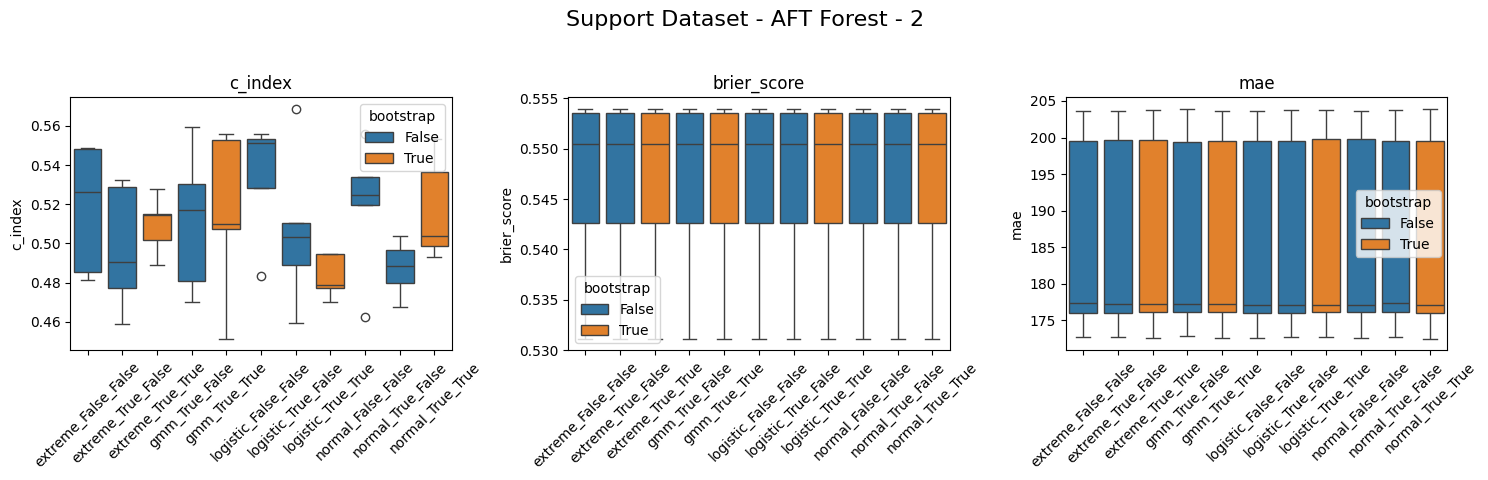

In [106]:
boxplots_multiple_metrics(
    df_support,
    title="Support Dataset - AFT Forest - 2",
    xlabel=None,
    metrics=["c_index", "brier_score", "mae"],
    hue="bootstrap"
)

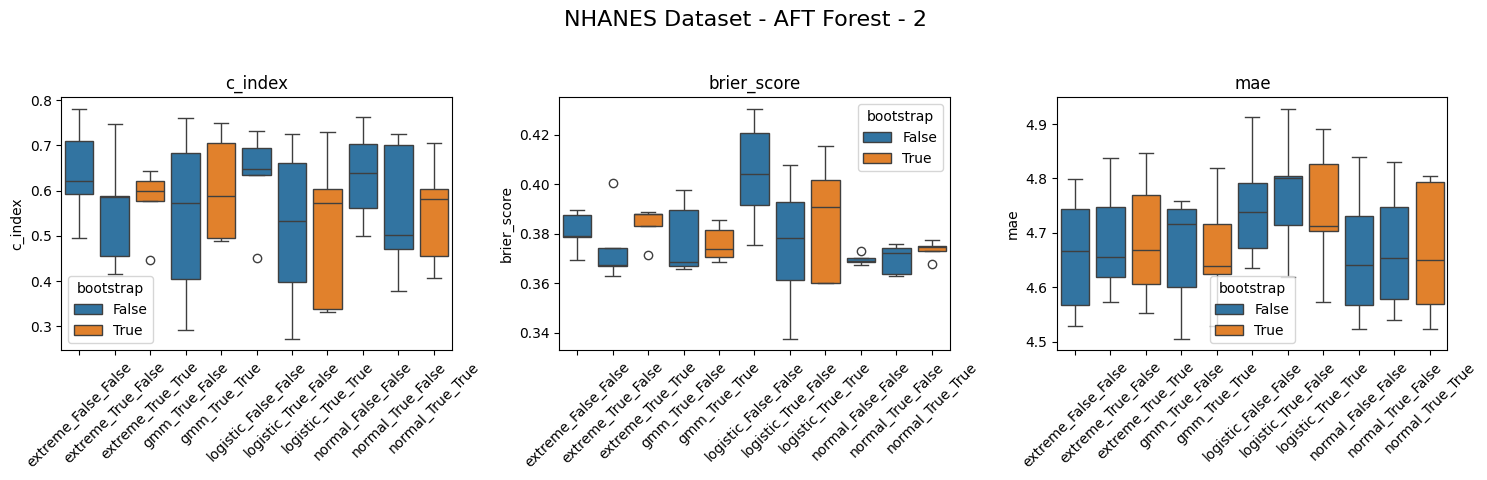

In [107]:
boxplots_multiple_metrics(
    df_nhanes,
    title="NHANES Dataset - AFT Forest - 2",
    xlabel=None,
    metrics=["c_index", "brier_score", "mae"],
    hue="bootstrap"
)

In [108]:
def plot(df, title, xlabel, ylabel, metric='c_index'):
    df_exploded = df.explode(metric)
    df_sorted = df_exploded.sort_values("function")
    df_sorted = df_sorted.sort_values("custom_dist", ascending=True)

    boxplot_with_errorbars(
        df_sorted,
        title=title,
        xlabel=xlabel,
        ylabel=ylabel,
        metric=metric
    )

In [26]:
def latexify_exp(df, index=1, dataset='nhanes'):
    new_latex = pd.DataFrame()

    df_a = df.copy()
    df_a.sort_values(by=['function', 'custom_dist', 'bootstrap'], inplace=True)

    new_latex['Function'] = df_a['function'].apply(
        lambda x: x.replace('_', ' ').capitalize() if x else 'Random Survival Forest'
    )
    new_latex['Custom Distribution'] = df_a['custom_dist'].apply(lambda x: 'Yes' if x else 'No')

    if index == 2:
        new_latex['Bootstrap'] = df_a['bootstrap'].apply(lambda x: 'Yes' if x else 'No')

    # Calculate mean/std per row if lists
    df_a['new_mean_c_index'] = df_a['c_index'].apply(
        lambda x: np.mean(x) if isinstance(x, list) else x
    )
    df_a['new_std_c_index'] = df_a['c_index'].apply(
        lambda x: np.std(x) if isinstance(x, list) else 0
    )

    df_a['new_mean_brier_score'] = df_a['brier_score'].apply(
        lambda x: np.mean(x) if isinstance(x, list) else x
    )
    df_a['new_std_brier_score'] = df_a['brier_score'].apply(
        lambda x: np.std(x) if isinstance(x, list) else 0
    )

    df_a['new_mean_mae'] = df_a['mae'].apply(
        lambda x: np.mean(x) if isinstance(x, list) else x
    )
    df_a['new_std_mae'] = df_a['mae'].apply(
        lambda x: np.std(x) if isinstance(x, list) else 0
    )

    new_latex['c_index'] = df_a.apply(
        lambda row: f"{round(row['new_mean_c_index'], 3)} ± {round(row['new_std_c_index'], 3)}",
        axis=1
    )
    new_latex['brier_score'] = df_a.apply(
        lambda row: f"{round(row['new_mean_brier_score'], 3)} ± {round(row['new_std_brier_score'], 3)}",
        axis=1
    )
    new_latex['mae'] = df_a.apply(
        lambda row: f"{round(row['new_mean_mae'], 3)} ± {round(row['new_std_mae'], 3)}",
        axis=1
    )

    if not os.path.exists("tables"):
        os.makedirs("tables")
    
    new_latex.to_latex(
        f"tables/latexify_exp{index}_{dataset}.tex",
        index=False,
        escape=False,
        column_format= 'lcccc' if index == 1 else 'lccccc',
        header= ['Function', 'Custom Distribution', 'C-Index', 'Brier Score', 'MAE'] if index == 1 else ['Function', 'Custom Distribution', 'Bootstrap', 'C-Index', 'Brier Score', 'MAE']
    )

In [27]:
def latexify_exp_t(df, index=1, dataset='nhanes'):
    new_latex = pd.DataFrame()

    df_a = df.copy()
    df_a.sort_values(by=['function', 'custom_dist', 'bootstrap'], inplace=True)

    new_latex['Function'] = df_a['function'].apply(
        lambda x: x.replace('_', ' ').capitalize() if x else 'Random Survival Forest'
    )
    new_latex['Custom Distribution'] = df_a['custom_dist'].apply(lambda x: 'Yes' if x else 'No')

    if index == 2:
        new_latex['Bootstrap'] = df_a['bootstrap'].apply(lambda x: 'Yes' if x else 'No')

    new_latex['c_index'] = df_a['c_index_test'].map("{:.3f}".format)
    new_latex['brier_score'] = df_a['brier_score_test'].map("{:.3f}".format)
    new_latex['mae'] = df_a['mae_test'].map("{:.3f}".format)


    if not os.path.exists("tables"):
        os.makedirs("tables")
    
    new_latex.to_latex(
        f"tables/latexify_test_exp{index}_{dataset}.tex",
        index=False,
        escape=False,
        column_format= 'lcccc' if index == 1 else 'lccccc',
        header= ['Function', 'Custom Distribution', 'C-Index Test', 'Brier Score Test', 'MAE Test'] if index == 1 else ['Function', 'Custom Distribution', 'Bootstrap', 'C-Index', 'Brier Score', 'MAE']
    )

In [28]:
latexify_exp(df_nhanes, 1, dataset='nhanes')
latexify_exp(df_support, 1,  dataset='support')

In [29]:
latexify_exp_t(df_nhanes, 1, dataset='nhanes')
latexify_exp_t(df_support, 1,  dataset='support')

In [30]:
latexify_exp_t(df_nhanes, 2, dataset='nhanes')
latexify_exp_t(df_support, 2,  dataset='support')

In [31]:
df_nhanes = aft_nhanes_dataset
df_support = aft_support_dataset

In [32]:
df_nhanes

,params,c_index,brier_score,mae,mean_c_index,mean_brier_score,mean_mae,c_index_test,brier_score_test,mae_test,index,model,dataset,params_dict,function,bootstrap,custom_dist,function_custom_dist_bootstrap
0,"{'function': 'extreme', 'is_bootstrap': False,...","[0.7810027695370196, 0.6222719455328807, 0.710...","[0.38962510631126496, 0.3791282542120146, 0.37...","[4.527925531914893, 4.799058291245791, 4.66621...",0.640200,0.380841,4.661019,0.784826,0.389569,4.775878,37,aft_forest,nhanes,"{'function': 'extreme', 'is_bootstrap': False,...",extreme,False,False,extreme_False_False
6,"{'function': 'extreme', 'is_bootstrap': False,...","[0.45589454859955697, 0.7484650981365578, 0.58...","[0.3629552561927711, 0.4005982429645798, 0.366...","[4.572611923758865, 4.837805134680134, 4.65558...",0.558772,0.374440,4.686656,0.747692,0.398483,4.792087,9,aft_forest,nhanes,"{'function': 'extreme', 'is_bootstrap': False,...",extreme,False,True,extreme_True_False
1,"{'function': 'extreme', 'is_bootstrap': True, ...","[0.598515329539332, 0.5781745004521196, 0.6430...","[0.3878062176345489, 0.3880716030944452, 0.383...","[4.551972517730496, 4.8463278619528625, 4.6688...",0.577537,0.383821,4.688750,0.642340,0.383295,4.723865,10,aft_forest,nhanes,"{'function': 'extreme', 'is_bootstrap': True, ...",extreme,True,True,extreme_True_True
2,"{'function': 'gmm', 'is_bootstrap': False, 'is...","[0.7600589332576411, 0.5721568766511232, 0.404...","[0.3668386598171634, 0.36572841311272936, 0.39...","[4.505596187943262, 4.759469696969697, 4.71617...",0.542723,0.377690,4.664957,0.749777,0.363029,4.686916,11,aft_forest,nhanes,"{'function': 'gmm', 'is_bootstrap': False, 'is...",gmm,False,True,gmm_True_False
10,"{'function': 'gmm', 'is_bootstrap': True, 'is_...","[0.7486595129557563, 0.5874484494955763, 0.495...","[0.38166818915215944, 0.36875780641672357, 0.3...","[4.528756648936169, 4.8199442340067336, 4.6382...",0.604865,0.376096,4.665550,0.752801,0.383200,4.758618,12,aft_forest,nhanes,"{'function': 'gmm', 'is_bootstrap': True, 'is_...",gmm,True,True,gmm_True_True
4,"{'function': 'logistic', 'is_bootstrap': False...","[0.6936652676935026, 0.7319334763568022, 0.451...","[0.4043107283213546, 0.42058534387723956, 0.39...","[4.635139627659574, 4.913089225589226, 4.79197...",0.632248,0.404505,4.750102,0.733769,0.416324,4.929723,51,aft_forest,nhanes,"{'function': 'logistic', 'is_bootstrap': False...",logistic,False,False,logistic_False_False
9,"{'function': 'logistic', 'is_bootstrap': False...","[0.5340826473720525, 0.6608857998971649, 0.724...","[0.3783913546678432, 0.3926899581102869, 0.407...","[4.617963209219858, 4.928109217171717, 4.80067...",0.518114,0.375501,4.773066,0.729540,0.407563,4.895179,15,aft_forest,nhanes,"{'function': 'logistic', 'is_bootstrap': False...",logistic,False,True,logistic_True_False
5,"{'function': 'logistic', 'is_bootstrap': True,...","[0.5730403320776419, 0.6033939114554706, 0.332...","[0.4017381217786572, 0.39078040137030134, 0.36...","[4.573720079787234, 4.826888678451178, 4.71228...",0.515292,0.385617,4.741620,0.745353,0.403789,4.925285,16,aft_forest,nhanes,"{'function': 'logistic', 'is_bootstrap': True,...",logistic,True,True,logistic_True_True
3,"{'function': 'normal', 'is_bootstrap': False, ...","[0.7631578947368421, 0.6387383202425488, 0.561...","[0.3687636132459038, 0.3671972090794072, 0.370...","[4.523326684397164, 4.83912037037037, 4.640006...",0.633335,0.369621,4.660036,0.763659,0.367575,4.692568,46,aft_forest,nhanes,"{'function': 'normal', 'is_bootstrap': False, ...",normal,False,False,normal_False_False
7,"{'function': 'normal', 'is_bootstrap': False, ...","[0.5023159762340077, 0.7004684314107906, 0.471...","[0.3635897649424228, 0.36300436439370204, 0.37...","[4.539284131205674, 4.830965909090909, 4.65353...",0.555389,0.369816,4.670184,0.724604,0.364006,4.691564,13,aft_forest,nhanes,"{'function': 'normal', 'is_bootstrap': False, ...",normal,False,True,normal_True_False


In [33]:
latexify_exp(df_nhanes, 2, dataset='nhanes')
latexify_exp(df_support, 2,  dataset='support')

In [34]:
# plot(
#     df[df["function"] == "normal"],
#     title='Normal Distribution AFT Forest Comparison',
#     xlabel='Model',
#     ylabel='C-Index'
# )

In [35]:
# plot(
#     df[df["function"] == "normal"],
#     title='Normal Distribution AFT Forest Comparison',
#     xlabel='Model',
#     ylabel='MAE',
#     metric='mae'
# )

In [36]:
# plot(
#     df[df["function"] == "normal"],
#     title='Normal Distribution AFT Forest Comparison',
#     xlabel='Model',
#     ylabel='Brier Score',
#     metric='brier_score'
# )

In [37]:
# plot(
#     df[df["function"] == "logistic"],
#     title='Logistic Distribution AFT Forest Comparison',
#     xlabel='Model',
#     ylabel='C-Index'
# )

In [38]:
# plot(
#     df[df["function"] == "logistic"],
#     title='Logistic Distribution AFT Forest Comparison',
#     xlabel='Model',
#     ylabel='MAE',
#     metric='mae'
# )

In [39]:
# plot(
#     df[df["function"] == "logistic"],
#     title='Logistic Distribution AFT Forest Comparison',
#     xlabel='Model',
#     ylabel='Brier Score',
#     metric='brier_score'
# )

In [40]:
# plot(
#     df[df["function"] == "extreme"],
#     title='Extreme Distribution AFT Forest Comparison',
#     xlabel='Model',
#     ylabel='C-Index'
# )

In [41]:
# plot(
#     df[df["function"] == "extreme"],
#     title='Extreme Distribution AFT Forest Comparison',
#     xlabel='Model',
#     ylabel='MAE',
#     metric='mae'
# )

In [42]:
# plot(
#     df[df["function"] == "extreme"],
#     title='Extreme Distribution AFT Forest Comparison',
#     xlabel='Model',
#     ylabel='Brier Score',
#     metric='brier_score'
# )

In [43]:
# plot(
#     df,
#     title='Distribution AFT Forest Comparison',
#     xlabel='Model',
#     ylabel='C-Index'
# )

In [44]:
# plot(
#     df,
#     title='Distribution AFT Forest Comparison',
#     xlabel='Model',
#     ylabel='MAE',
#     metric='mae'
# )

In [45]:
# plot(
#     df,
#     title='Distribution AFT Forest Comparison',
#     xlabel='Model',
#     ylabel='Brier Score',
#     metric='brier_score'
# )

### Experiment 2

In [46]:
df = aft_support_dataset

In [47]:
def boxplot_with_errorbars_bootstrap(df, title, xlabel, ylabel, metric='c_index'):
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=df,
        x="function_custom_dist_bootstrap",
        y=metric,
        hue="bootstrap",
    )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"graphs/{title.replace(' ', '_').lower()}_{metric}.png")
    plt.show()


In [48]:

def plot_bootstrap(df, title, xlabel, ylabel, metric='c_index'):
    df_exploded = df.explode(metric)
    df_sorted = df_exploded.sort_values("function")
    df_sorted = df_sorted.sort_values("custom_dist", ascending=True)

    boxplot_with_errorbars_bootstrap(
        df_sorted,
        title=title,
        xlabel=xlabel,
        ylabel=ylabel,
        metric=metric
    )

In [49]:
# plot_bootstrap(
#     df[df["function"] == "normal"],
#     title='Normal Distribution AFT Forest Comparison with Bootstrap',
#     xlabel='Model',
#     ylabel='C-Index'
# )


In [50]:

# plot_bootstrap(
#     df[df["function"] == "normal"],
#     title='Normal Distribution AFT Forest Comparison with Bootstrap',
#     xlabel='Model',
#     ylabel='MAE',
#     metric='mae'
# )


In [51]:

# plot_bootstrap(
#     df[df["function"] == "normal"],
#     title='Normal Distribution AFT Forest Comparison with Bootstrap',
#     xlabel='Model',
#     ylabel='Brier Score',
#     metric='brier_score'
# )


In [52]:
# plot_bootstrap(
#     df[df["function"] == "logistic"],
#     title='Logistic Distribution AFT Forest Comparison with Bootstrap',
#     xlabel='Model',
#     ylabel='C-Index'
# )

In [53]:
# plot(
#     df[df["function"] == "logistic"],
#     title='Logistic Distribution AFT Forest Comparison with Bootstrap',
#     xlabel='Model',
#     ylabel='MAE',
#     metric='mae'
# )

In [54]:

# plot_bootstrap(
#     df[df["function"] == "logistic"],
#     title='Logistic Distribution AFT Forest Comparison with Bootstrap',
#     xlabel='Model',
#     ylabel='Brier Score',
#     metric='brier_score'
# )

In [55]:
# plot_bootstrap(
#     df[df["function"] == "extreme"],
#     title='Extreme Distribution AFT Forest Comparison with Bootstrap',
#     xlabel='Model',
#     ylabel='C-Index'
# )

In [56]:
# plot_bootstrap(
#     df[df["function"] == "extreme"],
#     title='Extreme Distribution AFT Forest Comparison with Bootstrap',
#     xlabel='Model',
#     ylabel='MAE',
#     metric='mae'
# )

In [57]:
# plot_bootstrap(
#     df[df["function"] == "extreme"],
#     title='Extreme Distribution AFT Forest Comparison with Bootstrap',
#     xlabel='Model',
#     ylabel='Brier Score',
#     metric='brier_score'
# )

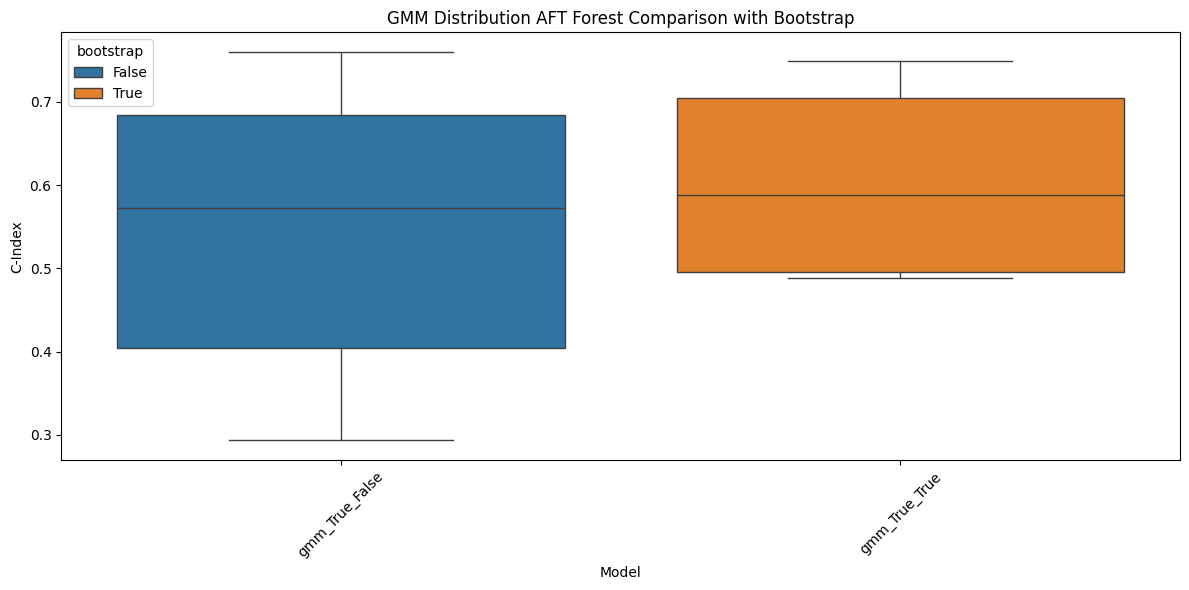

In [58]:
plot_bootstrap(
    df_nhanes[df_nhanes["function"] == "gmm"],
    title='GMM Distribution AFT Forest Comparison with Bootstrap',
    xlabel='Model',
    ylabel='C-Index'
)

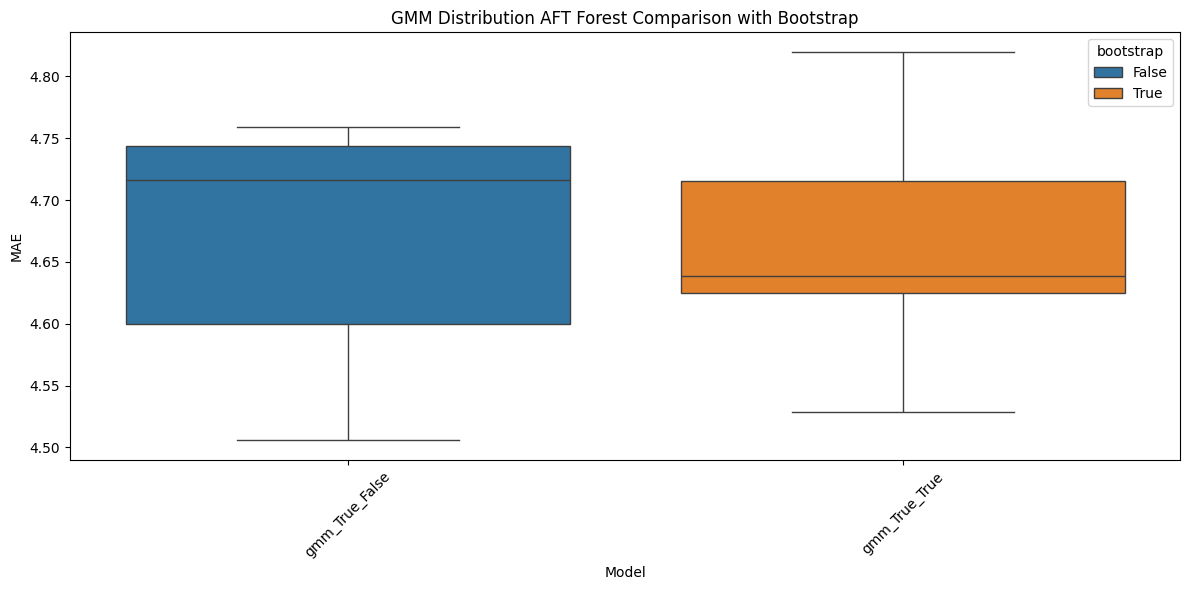

In [59]:
plot_bootstrap(
    df_nhanes[df_nhanes["function"] == "gmm"],
    title='GMM Distribution AFT Forest Comparison with Bootstrap',
    xlabel='Model',
    ylabel='MAE',
    metric='mae'
)

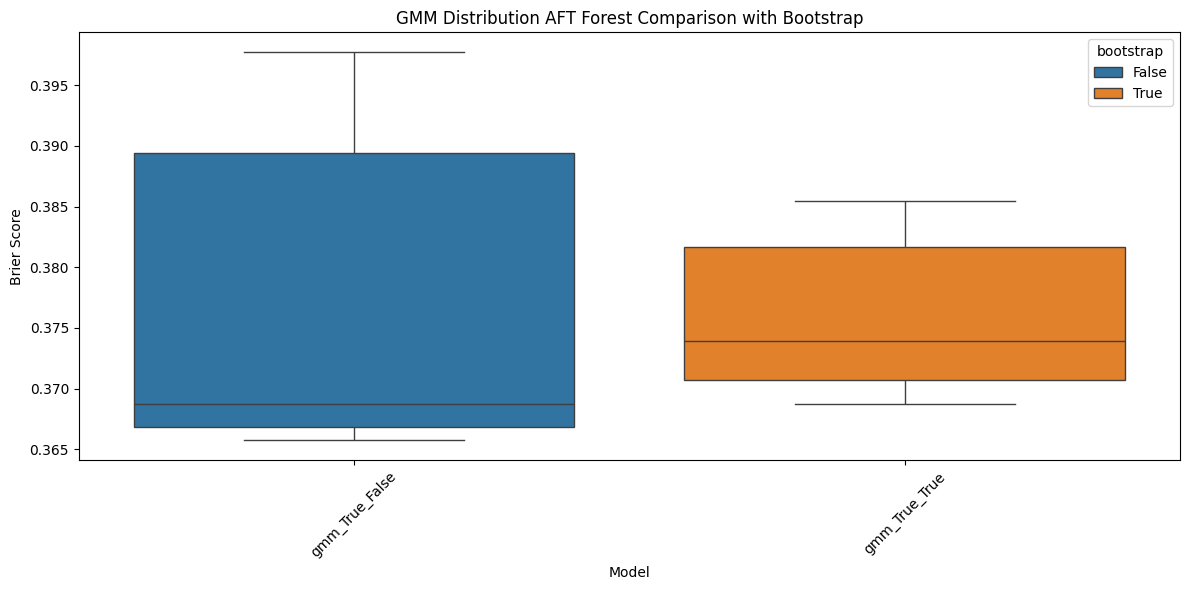

In [60]:
plot_bootstrap(
    df_nhanes[df_nhanes["function"] == "gmm"],
    title='GMM Distribution AFT Forest Comparison with Bootstrap',
    xlabel='Model',
    ylabel='Brier Score',
    metric='brier_score'
)

### Experiment 3

In [61]:
xgb_dfs_nhanes = xgb_dfs[xgb_dfs['dataset'] == 'nhanes']
rsf_dfs_nhanes = rsf_dfs[rsf_dfs['dataset'] == 'nhanes']

In [62]:
best_xgb_nhanes = xgb_dfs_nhanes.loc[xgb_dfs_nhanes['mean_c_index'].idxmax()]

In [63]:
best_xgb_nhanes

hyperparams         {'max_depth': 10, 'sigma': 5, 'learning_rate':...
c_index             [0.8117581928122474, 0.8218776262832219, 0.805...
brier_score         [0.1454601702559415, 0.14715772843853128, 0.14...
mae                 [5568.51544075306, 6646.7109305093, 7966.75782...
mean_c_index                                                  0.81212
mean_brier_score                                              0.14438
mean_mae                                                  6968.730574
c_index_test                                                 0.810435
brier_score_test                                             0.148293
mae_test                                                  8631.273461
model                                                         xgboost
function                                                       normal
dataset                                                        nhanes
Name: 47, dtype: object

In [64]:
best_rfs_nhanes  = rsf_dfs_nhanes.loc[rsf_dfs_nhanes['mean_c_index'].idxmax()]
best_rfs_nhanes 

hyperparams         {'n_trees': 100, 'max_depth': 15, 'min_samples...
c_index             [0.7632775843886156, 0.7760709916490842, 0.756...
brier_score         [0.14630151928098523, 0.1486180572153797, 0.15...
mae                 [3.15920966688439, 3.1301454138702467, 3.26393...
mean_c_index                                                 0.765962
mean_brier_score                                             0.146786
mean_mae                                                     3.148516
c_index_test                                                 0.771542
brier_score_test                                             0.146522
mae_test                                                     3.165434
model                                                             rsf
function                                                         None
dataset                                                        nhanes
Name: 0, dtype: object

In [65]:
best_aft_nhanes_dataset = aft_nhanes_dataset.loc[aft_nhanes_dataset['mean_c_index'].idxmax()]
best_aft_nhanes_dataset

params                            {'function': 'extreme', 'is_bootstrap': False,...
c_index                           [0.7810027695370196, 0.6222719455328807, 0.710...
brier_score                       [0.38962510631126496, 0.3791282542120146, 0.37...
mae                               [4.527925531914893, 4.799058291245791, 4.66621...
mean_c_index                                                                 0.6402
mean_brier_score                                                           0.380841
mean_mae                                                                   4.661019
c_index_test                                                               0.784826
brier_score_test                                                           0.389569
mae_test                                                                   4.775878
index                                                                            37
model                                                                    aft

In [66]:
combined_best_nhanes = pd.DataFrame({
    'XGB': best_xgb_nhanes,
    'RSF': best_rfs_nhanes,
    'AFT': best_aft_nhanes_dataset,
}).T.reset_index()

In [67]:
xgb_dfs_support = xgb_dfs[xgb_dfs['dataset'] == 'support']
rsf_dfs_support = rsf_dfs[rsf_dfs['dataset'] == 'support']

In [68]:
best_xgb_support = xgb_dfs_support.loc[xgb_dfs_support['mean_c_index'].idxmax()]
best_xgb_support

hyperparams         {'max_depth': 6, 'sigma': 0.5, 'learning_rate'...
c_index             [0.7815401094977387, 0.7591416283857544, 0.769...
brier_score         [0.4312354515216812, 0.4295572362117359, 0.434...
mae                 [266.50385977717355, 261.1484346430352, 240.04...
mean_c_index                                                 0.769262
mean_brier_score                                             0.432337
mean_mae                                                   260.927889
c_index_test                                                  0.76473
brier_score_test                                             0.441523
mae_test                                                   256.832218
model                                                         xgboost
function                                                      extreme
dataset                                                       support
Name: 18, dtype: object

In [69]:
best_rsf_support = rsf_dfs_support.loc[rsf_dfs_support['mean_c_index'].idxmax()]
best_rsf_support

hyperparams         {'n_trees': 100, 'max_depth': 15, 'min_samples...
c_index             [0.6945234421679601, 0.6758699023256117, 0.671...
brier_score         [0.401154148040389, 0.3756529813967721, 0.3913...
mae                 [735.7489626556016, 693.6446808510639, 734.581...
mean_c_index                                                 0.680599
mean_brier_score                                             0.393841
mean_mae                                                   732.000397
c_index_test                                                 0.681551
brier_score_test                                             0.399604
mae_test                                                   724.823232
model                                                             rsf
function                                                         None
dataset                                                       support
Name: 12, dtype: object

In [70]:
best_aft_support_dataset = aft_support_dataset.loc[aft_support_dataset['mean_c_index'].idxmax()]
best_aft_support_dataset

params                            {'function': 'logistic', 'is_bootstrap': False...
c_index                           [0.5282403823109402, 0.4833925266369866, 0.551...
brier_score                       [0.5539636660873336, 0.5311396002525706, 0.553...
mae                               [203.6846153846154, 172.61195542046605, 175.97...
mean_c_index                                                               0.534441
mean_brier_score                                                           0.546343
mean_mae                                                                 185.764336
c_index_test                                                               0.547705
brier_score_test                                                           0.554073
mae_test                                                                 194.505501
index                                                                            26
model                                                                    aft

In [71]:
combined_best = pd.DataFrame({
    'XGB': best_xgb_support,
    'RSF': best_rsf_support,
    'AFT': best_aft_support_dataset,
}).T.reset_index()
combined_best

,level_0,bootstrap,brier_score,brier_score_test,c_index,c_index_test,custom_dist,dataset,function,function_custom_dist_bootstrap,hyperparams,index,mae,mae_test,mean_brier_score,mean_c_index,mean_mae,model,params,params_dict
0,XGB,NaN,"[0.4312354515216812, 0.4295572362117359, 0.434...",0.441523,"[0.7815401094977387, 0.7591416283857544, 0.769...",0.76473,NaN,support,extreme,NaN,"{'max_depth': 6, 'sigma': 0.5, 'learning_rate'...",NaN,"[266.50385977717355, 261.1484346430352, 240.04...",256.832218,0.432337,0.769262,260.927889,xgboost,NaN,NaN
1,RSF,NaN,"[0.401154148040389, 0.3756529813967721, 0.3913...",0.399604,"[0.6945234421679601, 0.6758699023256117, 0.671...",0.681551,NaN,support,None,NaN,"{'n_trees': 100, 'max_depth': 15, 'min_samples...",NaN,"[735.7489626556016, 693.6446808510639, 734.581...",724.823232,0.393841,0.680599,732.000397,rsf,NaN,NaN
2,AFT,False,"[0.5539636660873336, 0.5311396002525706, 0.553...",0.554073,"[0.5282403823109402, 0.4833925266369866, 0.551...",0.547705,False,support,logistic,logistic_False_False,NaN,26,"[203.6846153846154, 172.61195542046605, 175.97...",194.505501,0.546343,0.534441,185.764336,aft_forest,"{'function': 'logistic', 'is_bootstrap': False...","{'function': 'logistic', 'is_bootstrap': False..."


In [72]:
def latexify(df, dataset='nhanes'):
    new_latex = pd.DataFrame()
    new_latex['model'] = df['model']
    
    # Calculate mean/std per row if lists
    df['new_mean_c_index'] = df['c_index'].apply(
        lambda x: np.mean(x) if isinstance(x, list) else x
    )
    df['new_std_c_index'] = df['c_index'].apply(
        lambda x: np.std(x) if isinstance(x, list) else 0
    )

    df['new_mean_brier_score'] = df['brier_score'].apply(
        lambda x: np.mean(x) if isinstance(x, list) else x
    )
    df['new_std_brier_score'] = df['brier_score'].apply(
        lambda x: np.std(x) if isinstance(x, list) else 0
    )

    df['new_mean_mae'] = df['mae'].apply(
        lambda x: np.mean(x) if isinstance(x, list) else x
    )
    df['new_std_mae'] = df['mae'].apply(
        lambda x: np.std(x) if isinstance(x, list) else 0
    )

    new_latex['c_index'] = df.apply(
        lambda row: f"{round(row['new_mean_c_index'], 3)} ± {round(row['new_std_c_index'], 3)}",
        axis=1
    )
    new_latex['brier_score'] = df.apply(
        lambda row: f"{round(row['new_mean_brier_score'], 3)} ± {round(row['new_std_brier_score'], 3)}",
        axis=1
    )
    new_latex['mae'] = df.apply(
        lambda row: f"{round(row['new_mean_mae'], 3)} ± {round(row['new_std_mae'], 3)}",
        axis=1
    )

    # Replace model names for latex
    new_latex['model'] = new_latex['model'].replace({
        'rsf': 'RSF',
        'xgboost': 'XGBoost',
        'aft_forest': 'AFT Forest',
    })

    if not os.path.exists("tables"):
        os.makedirs("tables")
    
    new_latex.to_latex(
        f"tables/latexify_{dataset}.tex",
        index=False,
        escape=False,
        column_format='lccc',
        header=['Model', 'C-Index', 'Brier Score', 'MAE']
    )


In [73]:
def latexify_test(df, dataset='nhanes'):
    new_latex = pd.DataFrame()
    new_latex['model'] = df['model']
    new_latex['c_index'] = df['c_index_test'].map("{:.3f}".format)
    new_latex['brier_score'] = df['brier_score_test'].map("{:.3f}".format)
    new_latex['mae'] = df['mae_test'].map("{:.3f}".format)

    print(new_latex)

    new_latex['model'] = new_latex['model'].replace({
        'rsf': 'RSF',
        'xgboost': 'XGBoost',
        'aft_forest': 'AFT Forest',
    })

    if not os.path.exists("tables"):
        os.makedirs("tables")
    
    new_latex.to_latex(
        f"tables/latexify_test_{dataset}.tex",
        index=False,
        escape=False,
        column_format='lccc',
        header=['Model', 'C-Index', 'Brier Score', 'MAE']
    )



In [74]:
latexify(combined_best, dataset='support')
latexify(combined_best_nhanes, dataset='nhanes')

latexify_test(combined_best, dataset='support')
latexify_test(combined_best_nhanes, dataset='nhanes')

        model c_index brier_score      mae
0     xgboost   0.765       0.442  256.832
1         rsf   0.682       0.400  724.823
2  aft_forest   0.548       0.554  194.506
        model c_index brier_score       mae
0     xgboost   0.810       0.148  8631.273
1         rsf   0.772       0.147     3.165
2  aft_forest   0.785       0.390     4.776


In [75]:
def plot_best_box_plot(df, title, xlabel, ylabel, metric='c_index'):
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=df,
        x="model",
        y=metric,
        hue="model"
    )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"graphs/{title.replace(' ', '_').lower()}_{metric}.png")
    plt.show()
    

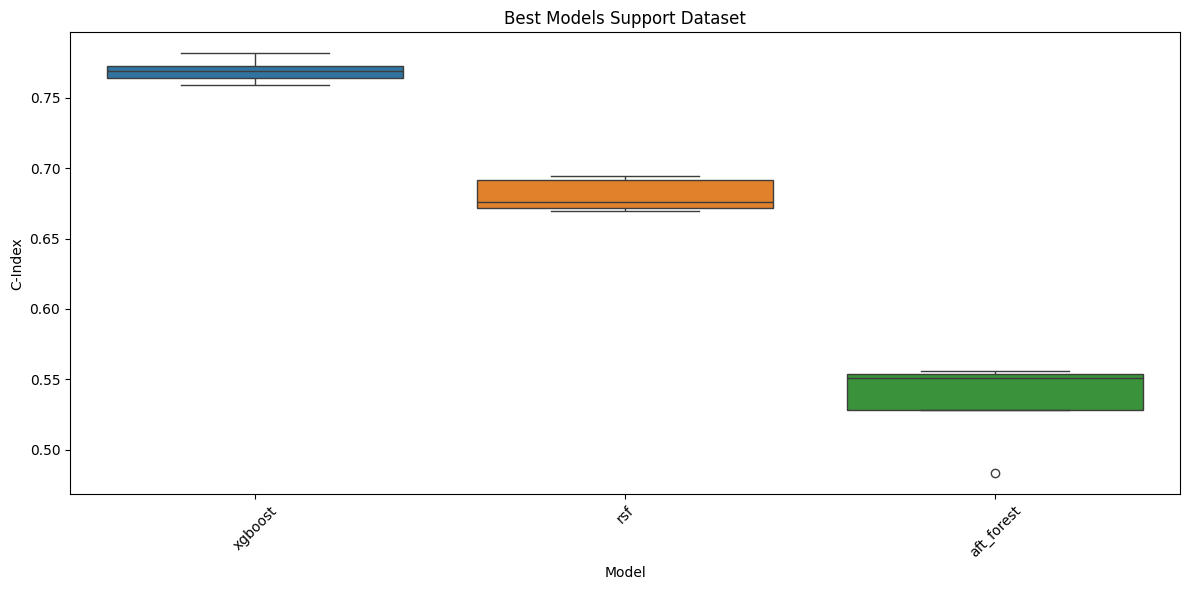

In [76]:
plot_best_box_plot(
    combined_best.explode('c_index'),
    title='Best Models Support Dataset',
    xlabel='Model',
    ylabel='C-Index'
)

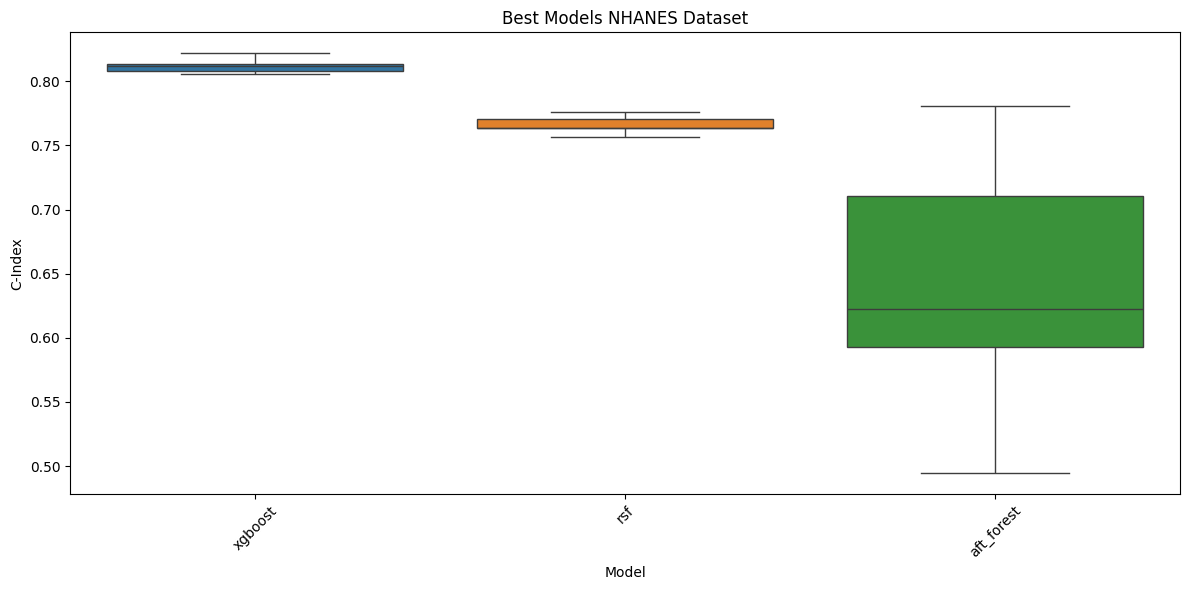

In [77]:
plot_best_box_plot(
    combined_best_nhanes.explode('c_index'),
    title='Best Models NHANES Dataset',
    xlabel='Model',
    ylabel='C-Index'
)

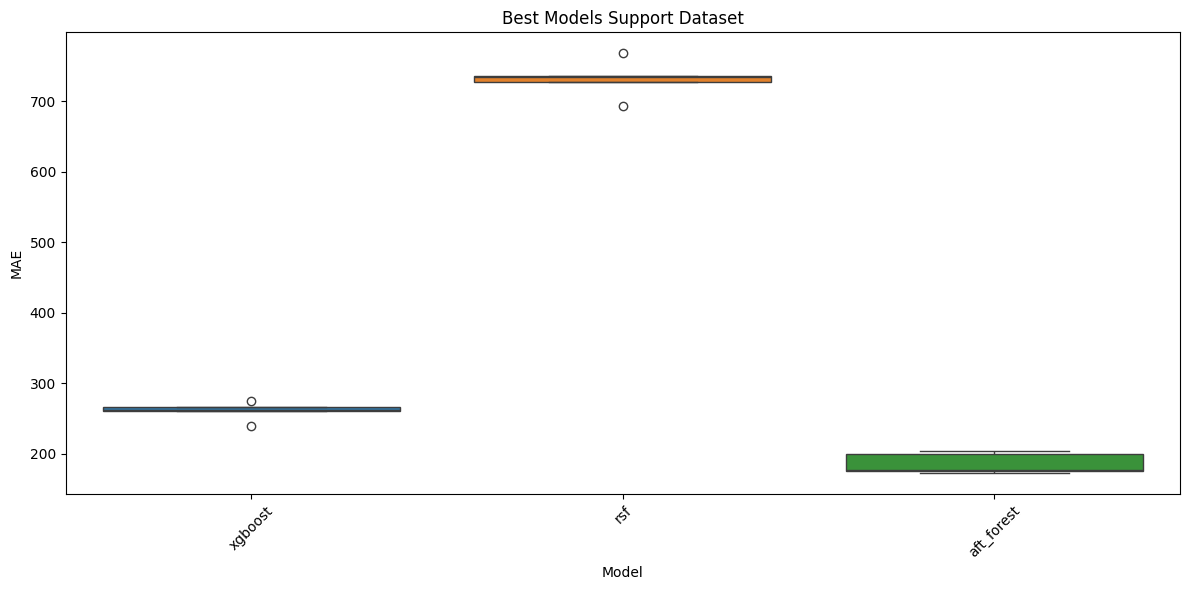

In [78]:
plot_best_box_plot(
    combined_best.explode('mae'),
    title='Best Models Support Dataset',
    xlabel='Model',
    ylabel='MAE',
    metric='mae'
)

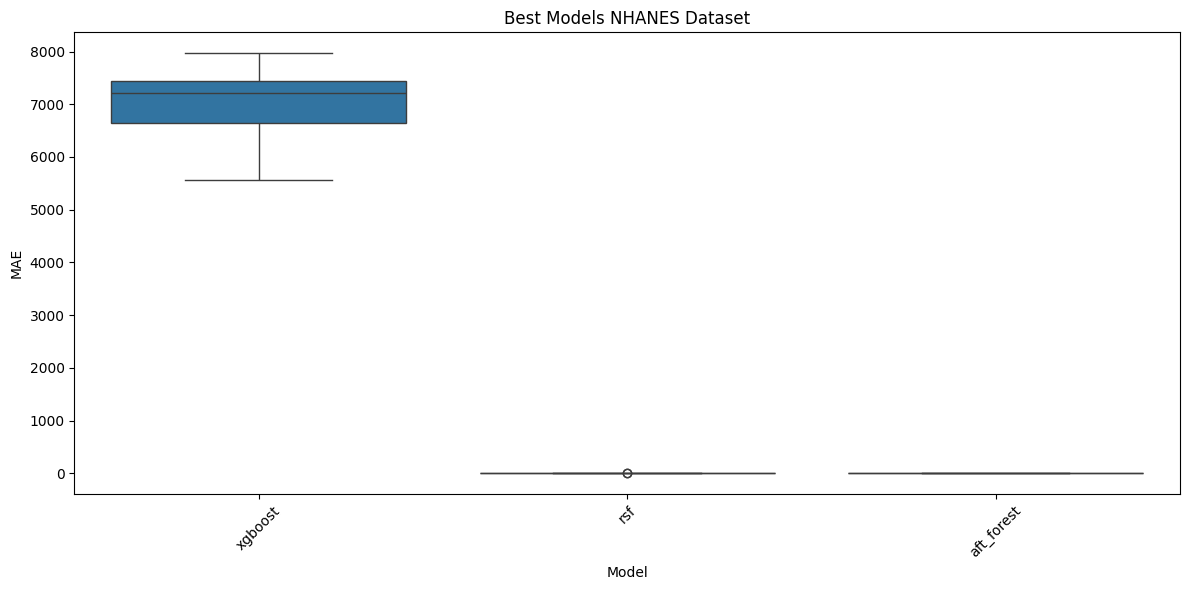

In [79]:
plot_best_box_plot(
    combined_best_nhanes.explode('mae'),
    title='Best Models NHANES Dataset',
    xlabel='Model',
    ylabel='MAE',
    metric='mae'
)

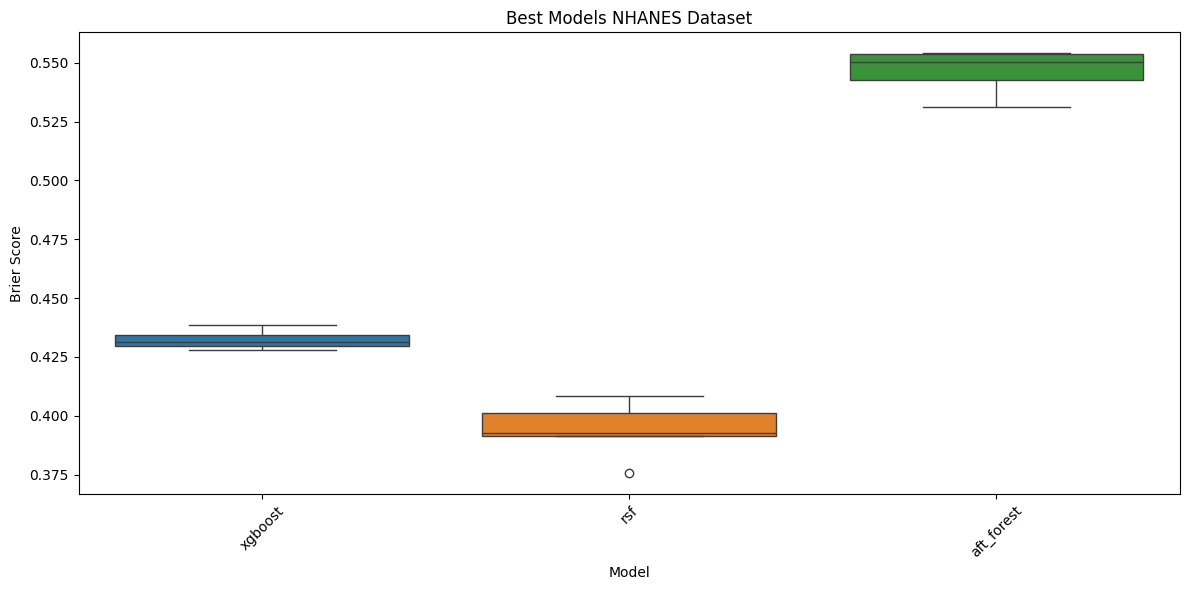

In [80]:
plot_best_box_plot(
    combined_best.explode('brier_score'),
    title='Best Models NHANES Dataset',
    xlabel='Model',
    ylabel='Brier Score',
    metric='brier_score'
)

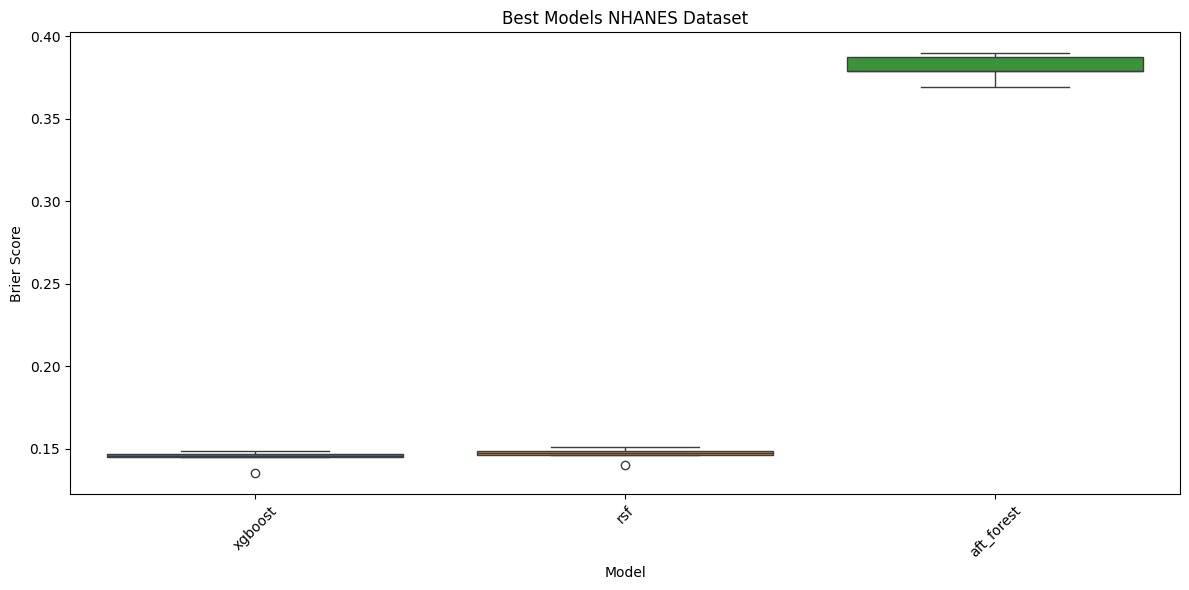

In [81]:
plot_best_box_plot(
    combined_best_nhanes.explode('brier_score'),
    title='Best Models NHANES Dataset',
    xlabel='Model',
    ylabel='Brier Score',
    metric='brier_score'
)

### Calibration Plots

In [82]:
import sys
sys.path.append("src")

from wrapper.xgboost_aft.xgboost_aft import XGBoostAFTWrapper
from dataset.nhanes import NHANESDataset


best_xgboost_dir = "results/results_xgboost/xgboost_normal_nhanes/best_model_combi_10.pkl"
best_xgboost_model = XGBoostAFTWrapper.load(best_xgboost_dir)

In [83]:
data = NHANESDataset()
X_train, X_test, y_train, y_test = data.get_train_test()

X_train_xgboost, X_test_xgboost, y_train_xgboost, y_test_xgboost = data.get_train_test_xgboost()

/mnt/c/Users/rizki/Master Files/ThesisUMCG/Survival-Tree-Analysis/src/dataset/nhanes.py:68: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data.replace({False: 0, True: 1}, inplace=True)


In [84]:
best_xgboost_model._score(X_test_xgboost, y_test_xgboost)

np.float64(0.7913487291921388)

In [85]:
y_pred = best_xgboost_model.predict(X_test_xgboost)

In [86]:
len(y_pred)

2853

In [87]:
y_pred

array([17.815508, 32.123596, 21.270464, ...,  7.218573, 14.283334,
       19.276148], dtype=float32)

In [88]:
from utils.metrics.metrics import mae

def plot_survival_trees(pred_times, y):
    """
    Plot the survival curves for the predicted and true survival times.
    Parameters:
    y_true: list of tuples (censored, time)
        The true survival times and censoring information.
    y_pred: list of tuples (censored, time)
        The predicted survival times and censoring information.
    """
    y_true = np.array([time for _, time in y])
    y_pred = np.array(pred_times)
    censored = np.array([not death for death, _ in y])

    print(f"y_true: {y_true.shape}, y_pred: {y_pred.shape}, censored: {censored.shape}")

    uncensored = ~censored

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.scatter(y_true[uncensored], y_pred[uncensored], alpha=0.6, label='Uncensored', color='blue', edgecolor='k')
    ax.scatter(y_true[censored], y_pred[censored], alpha=0.6, label='Censored', color='red', marker='x')

    lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
    ax.plot(lims, lims, 'r--', label='Perfect Prediction')

    mae_ = mae(y_pred, y)
    ax.set_title(f'True vs Predicted Survival Times\nMAE: {mae_:.2f}')
    ax.set_xlabel('True survival time (years)')
    ax.set_ylabel('Predicted survival time (years)')
    ax.grid(True, linestyle="--", alpha=0.7)
    ax.legend()
    plt.tight_layout()
    plt.show()

y_true: (2853,), y_pred: (2853,), censored: (2853,)


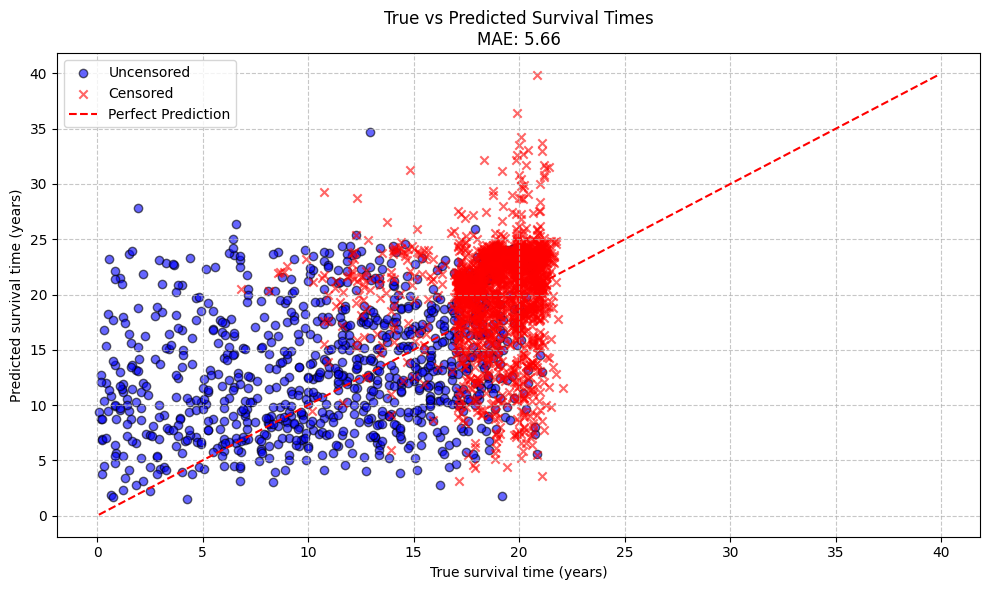

In [89]:
plot_survival_trees(y_pred, y_test)

In [90]:
best_xgboost_dir = "results/results_xgboost/xgboost_normal_support/best_model_combi_1.pkl"
best_xgboost_model = XGBoostAFTWrapper.load(best_xgboost_dir)

In [91]:
from dataset.support import SupportDataset

df = pd.read_csv('data/support2.csv')
data = SupportDataset(df)
X_train, X_test, y_train, y_test = data.get_train_test()

X_train_xgboost, X_test_xgboost, y_train_xgboost, y_test_xgboost = data.get_train_test_xgboost()

/mnt/c/Users/rizki/Master Files/ThesisUMCG/Survival-Tree-Analysis/src/dataset/support.py:101: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data.replace({False: 0, True: 1}, inplace=True)


In [92]:
best_xgboost_model._score(X_test_xgboost, y_test_xgboost)

np.float64(0.7573149280784307)

In [93]:
y_pred = best_xgboost_model.predict(X_test_xgboost)

y_true: (1821,), y_pred: (1821,), censored: (1821,)


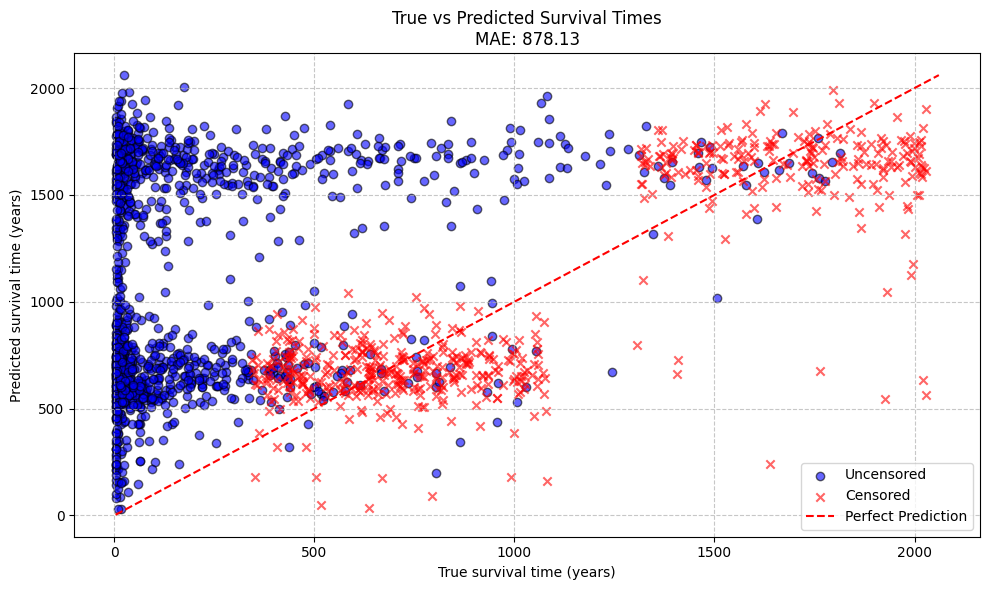

In [94]:
plot_survival_trees(y_pred, y_test)

In [95]:
from wrapper.random_survival_forest_scikit.random_survival_forest import RandomSurvivalForestWrapper

In [96]:
best_rsf_dir = "results/results_rsf/rsf_nhanes/tmp/results/best_model_combi_1.pkl"
best_rsf_model = RandomSurvivalForestWrapper.load(best_rsf_dir)

In [97]:
data = NHANESDataset()
X_train, X_test, y_train, y_test = data.get_train_test()

/mnt/c/Users/rizki/Master Files/ThesisUMCG/Survival-Tree-Analysis/src/dataset/nhanes.py:68: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data.replace({False: 0, True: 1}, inplace=True)


In [98]:
best_rsf_model._score(X_test, y_test)

np.float64(0.7715416583618672)

In [99]:
y_pred = best_rsf_model.predict(X_test)

y_true: (2853,), y_pred: (2853,), censored: (2853,)


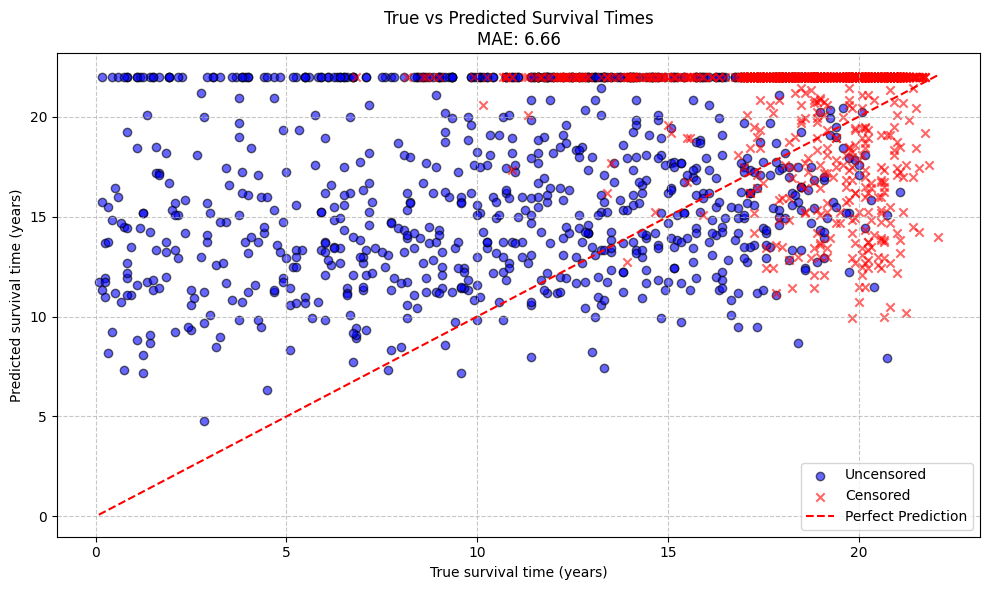

In [100]:
plot_survival_trees(y_pred, y_test)

In [101]:
df = pd.read_csv('data/support2.csv')
data = SupportDataset(df)
X_train, X_test, y_train, y_test = data.get_train_test()

/mnt/c/Users/rizki/Master Files/ThesisUMCG/Survival-Tree-Analysis/src/dataset/support.py:101: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data.replace({False: 0, True: 1}, inplace=True)


In [102]:
best_rsf_dir = "results/results_rsf/rsf_support/tmp/results/best_model_combi_2.pkl"
best_rsf_model = RandomSurvivalForestWrapper.load(best_rsf_dir)

In [103]:
best_rsf_model._score(X_test, y_test)

np.float64(0.6675225915115609)

In [104]:
y_pred = best_rsf_model.predict(X_test)

y_true: (1821,), y_pred: (1821,), censored: (1821,)


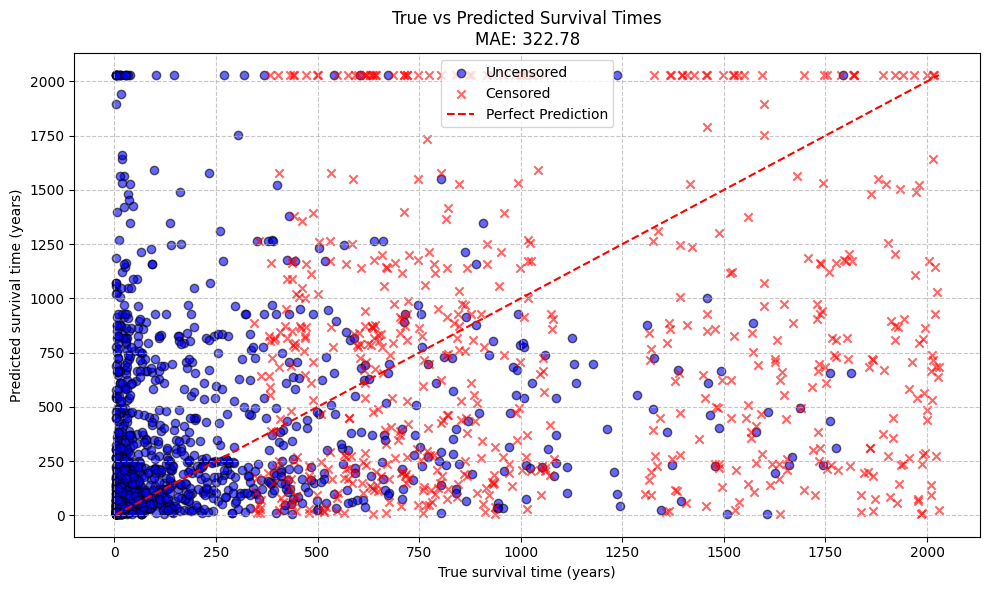

In [105]:
plot_survival_trees(y_pred, y_test)